In [1]:
from miscpy.utils.sympyhelpers import *
init_printing()

![Orbit Diagram](img/orbit_all_frames2.png)

$\mathbf{r} = [r\cos(\lambda)\sin(\pi/2-\phi), r\sin(\lambda)\sin(\pi/2 - \phi), r\cos(\pi/2 - \phi)]^T$

$\mathbf{v} = \frac{^\mathcal{I}\textrm{d}\mathbf{r}}{\textrm{d}t}$

$L = \mathbf{v} \cdot \mathbf{v} + \frac{\mu}{r} + U^{(1)}(r,\phi,\lambda)$

In [2]:
a,e,mu,r = symbols('a,e,mu,r',real=True,positive=True)
l,phi,E,th,O,w,nu,I,M = symbols('lambda,phi,E,theta,Omega,omega,nu,I,M',real=True)
rd,ld,phid,t = symbols('rdot,lambdadot,phidot,t',real=True)
U = Function('U^{(1)}')
p_r,p_p,p_l = symbols('p_r,p_phi,p_lambda',real=True)
a1,a2=symbols('alpha_1,alpha_2',positive=True,real=True)
al,a3,b1,b2,b3=symbols('alpha_lambda,alpha_3,beta_1,beta_2,beta_3',real=True)

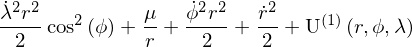

In [3]:
rvec = Matrix([r*cos(l)*sin(pi/2-phi),r*sin(l)*sin(pi/2 - phi),r*cos(pi/2 - phi)])
vvec = difftotalmat(rvec,t,{r:rd,l:ld,phi:phid})
L0 = simplify(vvec.dot(vvec))/2 + mu/r 
L = L0 + U(r,phi,l); L

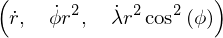

In [4]:
pr = diff(L,rd)
pphi = diff(L,phid)
pl = diff(L,ld)
pr,pphi,pl

$H = \sum p_i \dot q_i - L$

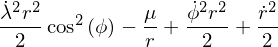

In [5]:
H0 = rd*pr + phid*pphi + ld*pl - L0;
H0

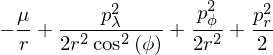

In [6]:
H0 = H0.subs(pr,p_r).subs(phid,p_p/r**2).subs(ld,p_l/r**2/cos(phi)**2); H0

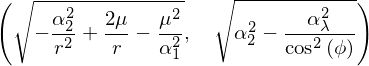

In [7]:
Pr = sqrt(2*mu/r - mu**2/a1**2 - a2**2/r**2)
Pphi = sqrt(a2**2 - al**2/cos(phi)**2)
Pr,Pphi

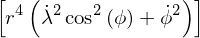

In [8]:
solve((pphi**2 - Pphi**2).subs(al,pl),a2**2)

$\mathbf{h} = \mathbf{r} \times \mathbf{v}$

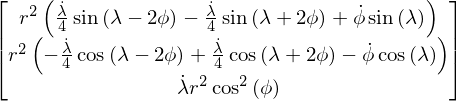

In [9]:
hvec = rvec.cross(vvec)
simplify(hvec)

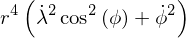

In [10]:
simplify(hvec.dot(hvec))

Therefore, we have shown that $\alpha_2 \equiv h$ and is conserved.

$Q_1 = nt + \beta_1 = \frac{\partial W}{\partial \alpha_1} = \frac{\partial}{\partial \alpha_1} \int \frac{\partial W_r}{\partial r} \mathrm{d}r = \int \frac{\partial}{\partial \alpha_1}  \frac{\partial W_r}{\partial r} \mathrm{d}r = \int \frac{\partial}{\partial \alpha_1} P_r \mathrm{d}r$

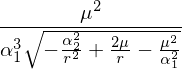

In [11]:
dPrda1 = diff(Pr,a1)
dPrda1

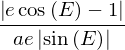

In [12]:
dPrda1 = simplify(dPrda1.subs([(r,a*(1-e*cos(E))),(a1,sqrt(mu*a)),(a2,sqrt(mu*a*(1-e**2)))]))
dPrda1

In [13]:
dr = diff(a*(1 - e*cos(E)),E)
dr

In [14]:
simplify(integrate((1 - e*cos(E))/(a*e*sin(E))*dr,E))

Therefore $\beta_1 = -nt_0$

$Q_2 = \beta_2 = \frac{\partial W}{\partial \alpha_2} = \frac{\partial}{\partial \alpha_2} \left[ \int \frac{\partial W_r}{\partial r} \mathrm{d}r + \int \frac{\partial W_\phi}{\partial \phi} \mathrm{d}\phi   \right]$

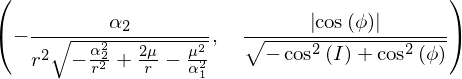

In [15]:
dPrda2 = diff(Pr,a2)
dPphida2 = simplify(diff(Pphi,a2).subs(al,a2*cos(I)))
dPrda2,dPphida2

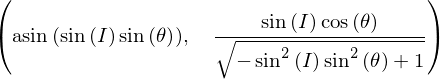

In [16]:
phidef = asin(sin(I)*sin(th))
dphidef = diff(phidef,th)
phidef,dphidef

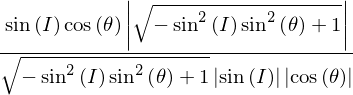

In [17]:
simplify(dPphida2.subs(phi,phidef)*dphidef)

= 1

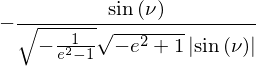

In [18]:
simplify(dPrda2.subs(a1,sqrt(mu*a)).subs(a2,sqrt(mu*a*(1 - e**2))).subs(r,a*(1-e**2)/(1+e*cos(nu)))*diff(a*(1-e**2)/(1+e*cos(nu)),nu))

=1

Therefore $\beta_2 = \theta - \nu = \omega$

$Q_\lambda = \beta_\lambda = \frac{\partial W}{\partial \alpha_\lambda} = \frac{\partial}{\partial \alpha_\lambda} \left[\int \frac{\partial W_\phi}{\partial \phi} \mathrm{d}\phi  + \alpha_\lambda \lambda  \right]$

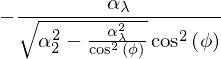

In [19]:
dPphidal = diff(Pphi,al)
dPphidal

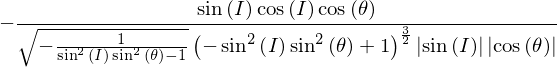

In [20]:
simplify(dPphidal.subs(al,a2*cos(I)).subs(phi,phidef)*dphidef)

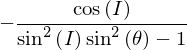

In [21]:
simplify(diff(atan(cos(I)*tan(th)),th))

Therefore, $\beta_3 = \beta_\lambda = \lambda - \tan^{-1}(\cos(I)\cos(\theta))$

Lagrange's Planetary Equations

In [22]:
z1 = Matrix([M,w,O,sqrt(mu*a),sqrt(mu*a*(1-e**2)),sqrt(mu*a*(1-e**2))*cos(I)])
y1 = Matrix([a,e,I,M,w,O])

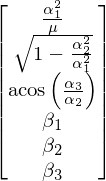

In [23]:
a1,a2=symbols('alpha_1,alpha_2',positive=True,real=True)
a3,b1,b2,b3=symbols('alpha_3,beta_1,beta_2,beta_3',real=True)
z = Matrix([b1,b2,b3,a1,a2,a3])
y = Matrix([a1**2/mu,sqrt(1 - (a2/a1)**2),acos(a3/a2),b1,b2,b3])
y

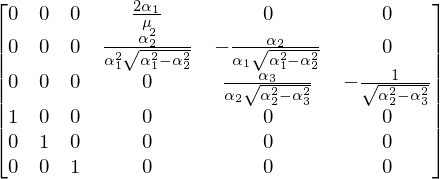

In [24]:
P = simplify(y.jacobian(z)); P

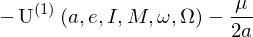

In [25]:
K = -mu/2/a - U(a,e,I,M,w,O);K

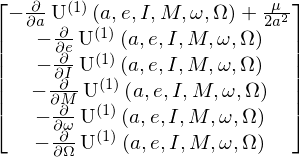

In [26]:
gradK = Matrix([diff(K,x) for x in y1]); gradK

In [27]:
J = zeros(6,6)
J[0:3,3:6] = eye(3)
J[3:6,0:3] = -eye(3)

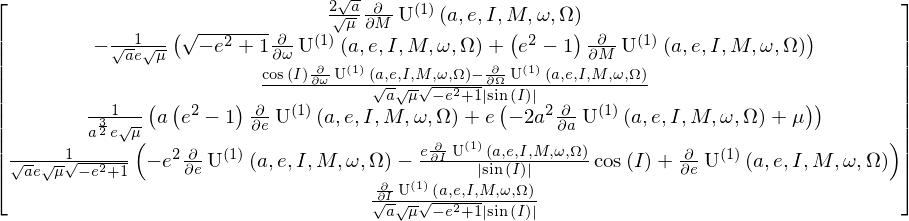

In [28]:
simplify((P*J*P.transpose()*gradK).subs([(a1,sqrt(mu*a)),(a2,sqrt(mu*a*(1-e**2))),(a3,sqrt(mu*a*(1-e**2))*cos(I))]))